# Finite Difference Approximations 有限差分逼近

我们的目标是逼近一个微分方程的解，即找到一个函数(或者这个函数的一些离散逼近)在给定空间和/或时间上，它的各阶导数之间满足特定的关系，且满足定义域上一定的边界条件。


In [2]:
from sympy import *
import numpy as np
import pandas as pd
from manim import *

import matplotlib.pyplot as plt


Manim Community v0.17.3

In [3]:
# Example 1.1

x, h = symbols("x, h")
u = symbols("u", cls=Function)
print(u(x))

u(x)


In [4]:
print(u(x).subs({u:"sin"}))

sin(x)


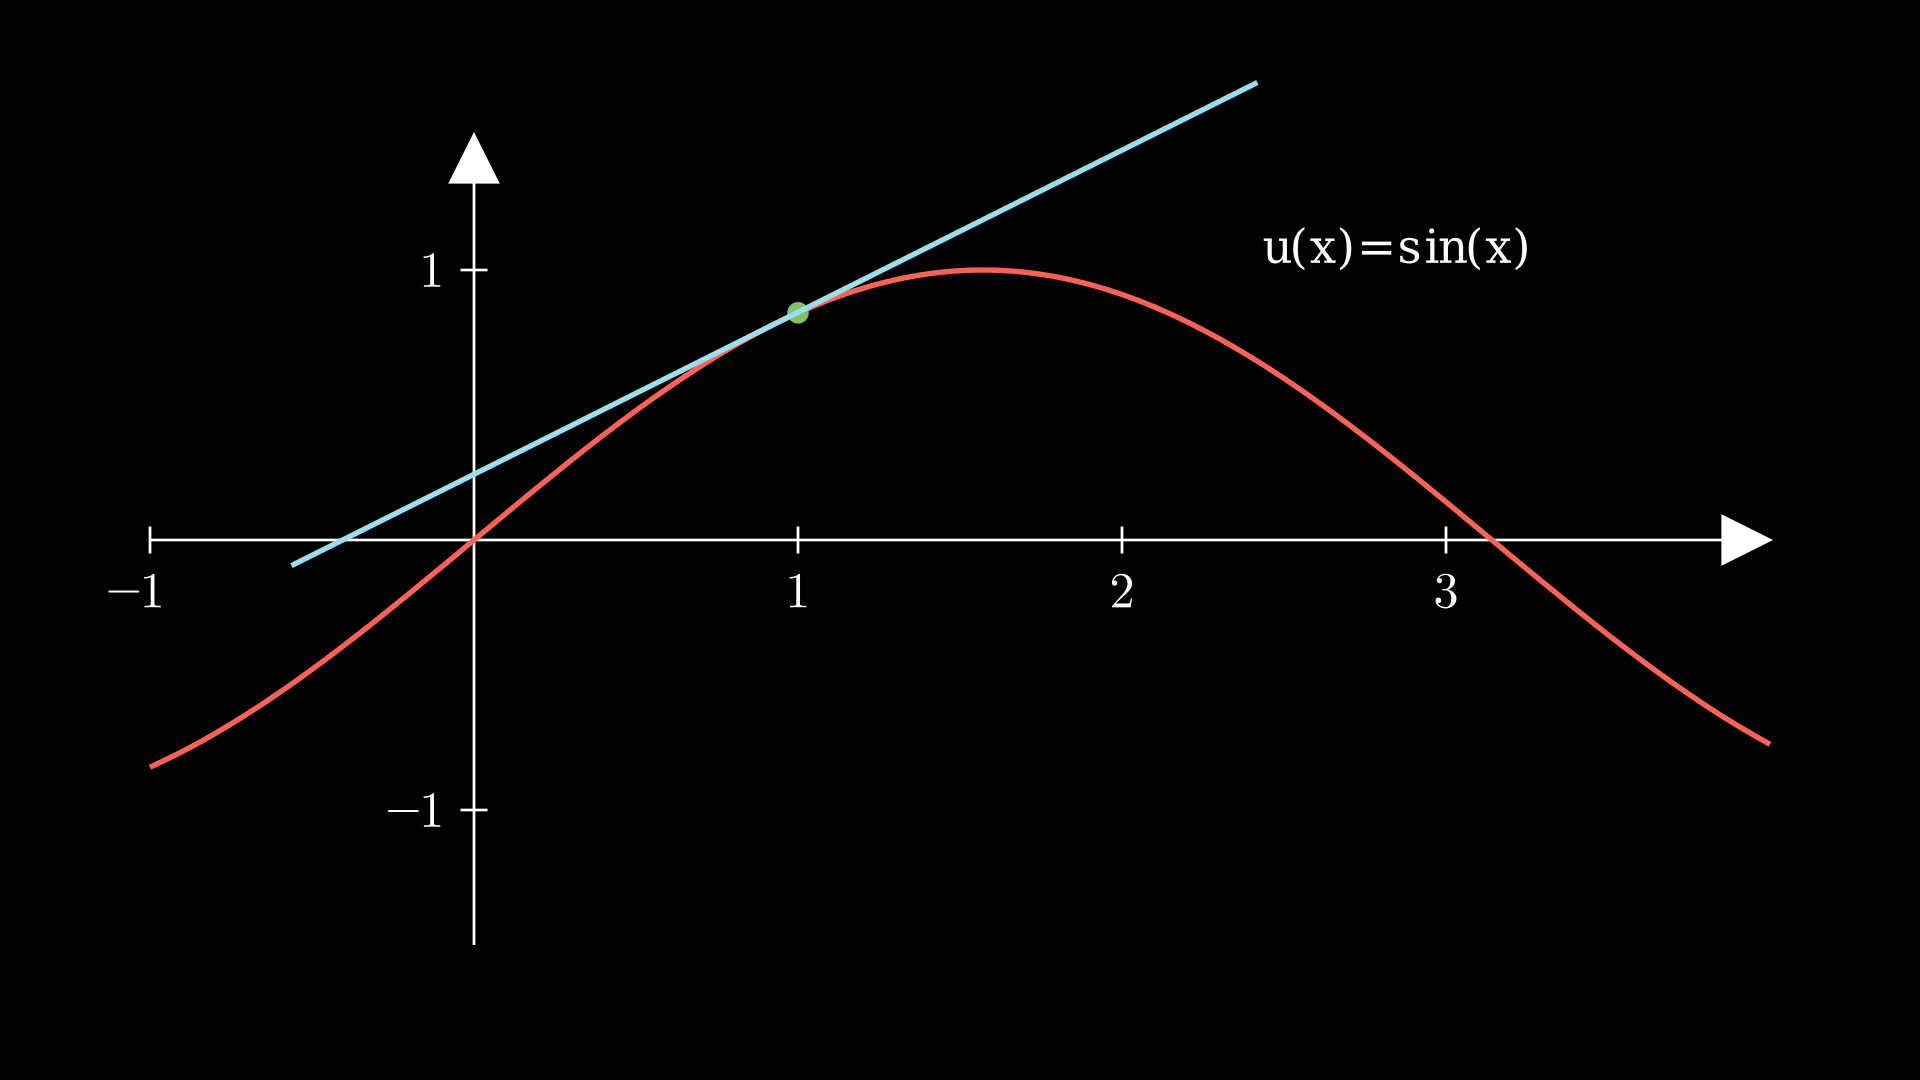

In [ ]:
class Exp11(Scene):
    def construct(self):
        ax = Axes(x_range=[-1, 4, 1], y_range=[-1.5, 1.5]).add_coordinates()
        curve = ax.plot(sin, color=RED)
        self.add(Text("u(x)=sin(x)", font_size=25).next_to(curve).shift(2*UP+4*LEFT))
        self.add(ax, curve)
        self.add(Dot(ax.coords_to_point(1, sin(1)), color=GREEN))
        self.add(TangentLine(curve, 0.4, 8, color=BLUE_B))


%manim -v Warning Exp11

In [6]:
D_p = lambda u : (u(x+h)-u(x))/h
res = D_p(u) - u(x).diff(x)
pprint(res)

  d          -u(x) + u(h + x)
- ──(u(x)) + ────────────────
  dx                h        


In [7]:
taylor = D_p(u).series(h, 0, 3)
pprint(taylor)

                      ⎛  2        ⎞│          ⎛  3        ⎞│            
                      ⎜ d         ⎟│        2 ⎜ d         ⎟│            
                    h⋅⎜────(u(ξ₁))⎟│       h ⋅⎜────(u(ξ₁))⎟│            
                      ⎜   2       ⎟│          ⎜   3       ⎟│            
⎛ d        ⎞│         ⎝dξ₁        ⎠│ξ₁=x      ⎝dξ₁        ⎠│ξ₁=x    ⎛ 3⎞
⎜───(u(ξ₁))⎟│     + ──────────────────── + ───────────────────── + O⎝h ⎠
⎝dξ₁       ⎠│ξ₁=x            2                       6                  


In [8]:
D_0 = lambda u : (u(x+h)-u(x-h))/(2*h)
D_m = lambda u : (u(x)-u(x-h))/h
D_3 = lambda u : (2*u(x+h)+3*u(x)-6*u(x-h)+u(x-2*h))/(6*h)
pprint(D_3(u))

3⋅u(x) + u(-2⋅h + x) - 6⋅u(-h + x) + 2⋅u(h + x)
───────────────────────────────────────────────
                      6⋅h                      


In [ ]:
u = sin
f0 = lambdify((x, h), D_0(u)-u(x).diff(), "numpy")
fp = lambdify((x, h), D_p(u)-u(x).diff(), "numpy")
fm = lambdify((x, h), D_m(u)-u(x).diff(), "numpy")
f3 = lambdify((x, h), D_3(u)-u(x).diff(), "numpy")


h_eval = np.array([.1, .05, .01, .005, .001])
f3(1, h_eval)

array([6.82069338e-05, 8.64914174e-06, 6.99413066e-08, 8.75403661e-09,
       6.99793556e-11])

In [ ]:
table_1 =np.array([fp(1, h_eval), fm(1, h_eval), f0(1, h_eval), f3(1, h_eval)]).T
df_1 = pd.DataFrame(table_1)
df_1

,0,1,2,3
0,-0.042939,0.041138,-9.000537e-04,6.820693e-05
1,-0.021257,0.020807,-2.250978e-04,8.649142e-06
2,-0.004216,0.004198,-9.004993e-06,6.994131e-08
3,-0.002106,0.002101,-2.251257e-06,8.754037e-09
4,-0.000421,0.000421,-9.005045e-08,6.997936e-11


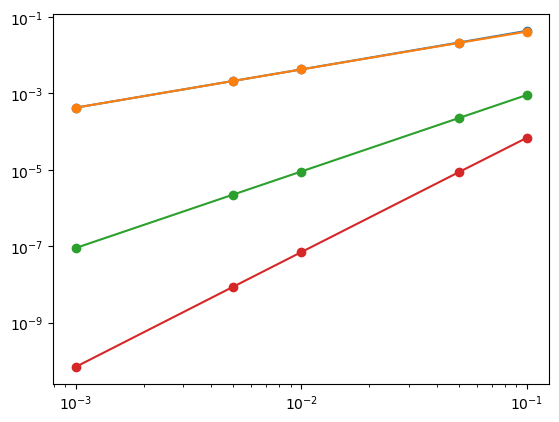

In [ ]:
plt.loglog(h_eval, np.abs(table_1), '-o')
plt.show()

## 1.1 Truncation errors 截断误差


In [9]:
u = symbols('u', cls=Function)
pprint(u(x+h))

u(h + x)


In [11]:
pprint(u(x+h).series(h, 0, 4))

                                ⎛  2        ⎞│          ⎛  3        ⎞│        
                              2 ⎜ d         ⎟│        3 ⎜ d         ⎟│        
                             h ⋅⎜────(u(ξ₁))⎟│       h ⋅⎜────(u(ξ₁))⎟│        
                                ⎜   2       ⎟│          ⎜   3       ⎟│        
         ⎛ d        ⎞│          ⎝dξ₁        ⎠│ξ₁=x      ⎝dξ₁        ⎠│ξ₁=x    
u(x) + h⋅⎜───(u(ξ₁))⎟│     + ───────────────────── + ───────────────────── + O
         ⎝dξ₁       ⎠│ξ₁=x             2                       6              

    
    
    
    
⎛ 4⎞
⎝h ⎠
    


## 1.2 Deriving finite difference approximations 推导有限差分近似

两种视角，待定系数法和插值法得到的导数公式相同，等于
$$
\begin{pmatrix}
0 & 1 & 0
\end{pmatrix}
\begin{pmatrix}
1 & 0 & 0 \\
1 & -h_k & (-h_k)^2\\
1 & -(h_{k-1}+h_k) & (-h_{k-1}-h_k)^2\\
\end{pmatrix}^{-1}
\begin{pmatrix}
u(x_k) \\
u(x_k-h_k) \\
u(x_k-h_k-h_{k-1})
\end{pmatrix}
$$

## 1.5 A general approach to deriving the coefficients

In [ ]:
def fdcoeffV(k, xbar, x):
    n = len(x)
    b = np.zeros(n)
    b[k] = 1

    A = np.ones([n, n])
    Dbar = x-xbar
    for i in range(1, n):
        A[i] = Dbar **i
    # A = A.T
    print(A)

    # return b@np.linalg.inv(A)
    return np.linalg.solve(A, b)

In [ ]:
x = np.array([1, 2, 3])

fdcoeffV(1, 3, x)

[[ 1.  1.  1.]
 [-2. -1.  0.]
 [ 4.  1.  0.]]


array([ 0.5, -2. ,  1.5])